In [3]:
!pip -q install ultralytics opencv-python pandas matplotlib

import os, glob, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import files
uploaded = files.upload()  # Use the UI to upload your downloaded sample zip



Saving 164.tar.gz to 164.tar.gz


In [6]:
import tarfile

for filename in uploaded.keys():
    if filename.endswith(".tar.gz"):
        with tarfile.open(filename, "r:gz") as tar:
            tar.extractall(path="/content/dataset")


/tmp/ipython-input-1964164675.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="/content/dataset")


📂 Folder: /content/dataset
📁 Subfolders: ['164']
📄 Files: ['._164']
🖼 Total images found: 1198
First 5 image paths: ['/content/dataset/164/164-20160223-12/000309.jpg', '/content/dataset/164/164-20160223-12/000352.jpg', '/content/dataset/164/164-20160223-12/000159.jpg', '/content/dataset/164/164-20160223-12/000145.jpg', '/content/dataset/164/164-20160223-12/000181.jpg']
📊 CSV files found: []


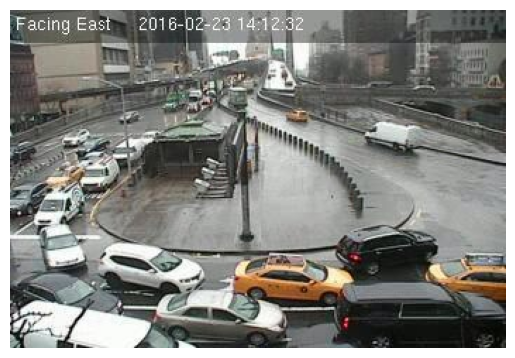

In [9]:
import os

data_dir = "/content/dataset"  # put the folder where you extracted

# Look inside the folder
for root, dirs, files in os.walk(data_dir):
    print("📂 Folder:", root)
    print("📁 Subfolders:", dirs)
    print("📄 Files:", files[:5])  # just show first 5 files
    break

import glob

# Search for images
image_files = glob.glob(data_dir + "/**/*.jpg", recursive=True)
print("🖼 Total images found:", len(image_files))
print("First 5 image paths:", image_files[:5])

# Search for CSV files
csv_files = glob.glob(data_dir + "/**/*.csv", recursive=True)
print("📊 CSV files found:", csv_files)

import matplotlib.pyplot as plt
import cv2

# Pick one image
img = cv2.imread(image_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()



In [10]:
import numpy as np

processed_images = []

for img_path in image_files[:100]:  # limit to 100 for demo
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize
    img = img / 255.0  # Normalize (0–1)
    processed_images.append(img)

processed_images = np.array(processed_images)
print("✅ Preprocessed images shape:", processed_images.shape)


✅ Preprocessed images shape: (100, 224, 224, 3)


In [11]:
np.save("/content/preprocessed_images.npy", processed_images)




In [14]:
import os, shutil

base_dir = "/content/dataset/164"
output_dir = "/content/time_of_day_dataset"
os.makedirs(output_dir, exist_ok=True)

# mapping folder names to time of day labels
time_mapping = {
    "09": "morning",
    "12": "noon",
    "14": "afternoon"
}

for folder in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, folder)):
        # get last 2 digits = hour
        hour = folder.split("-")[-1]
        label = time_mapping.get(hour, "unknown")

        # create label folder
        target_folder = os.path.join(output_dir, label)
        os.makedirs(target_folder, exist_ok=True)

        # move/copy images
        for img in os.listdir(os.path.join(base_dir, folder)):
            src = os.path.join(base_dir, folder, img)
            dst = os.path.join(target_folder, img)
            shutil.copy(src, dst)

print("✅ Dataset reorganized into:", os.listdir(output_dir))


✅ Dataset reorganized into: ['noon', 'afternoon', 'morning']


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/time_of_day_dataset"

# rescale pixel values
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# training set
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# validation set
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("✅ Classes found:", train_gen.class_indices)


Found 1917 images belonging to 3 classes.
Found 479 images belonging to 3 classes.
✅ Classes found: {'afternoon': 0, 'morning': 1, 'noon': 2}


In [18]:
import os

valid_ext = {".jpg", ".jpeg", ".png"}
bad_files = []

for root, _, files in os.walk(DATASET_DIR):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        if ext not in valid_ext:
            bad_files.append(os.path.join(root, f))

print("⚠️ Non-image or suspicious files:", bad_files)


⚠️ Non-image or suspicious files: ['/content/dataset/._164', '/content/dataset/164/.DS_Store', '/content/dataset/164/detection_annotation_converted.json', '/content/dataset/164/._164-20160223-12', '/content/dataset/164/._164-20160223-09', '/content/dataset/164/._164-20160223-14', '/content/dataset/164/._.DS_Store', '/content/dataset/164/164-20160223-12/._000100.xml', '/content/dataset/164/164-20160223-12/._000090.xml', '/content/dataset/164/164-20160223-12/000158.xml', '/content/dataset/164/164-20160223-12/._000131.xml', '/content/dataset/164/164-20160223-12/._000037.xml', '/content/dataset/164/164-20160223-12/000071.xml', '/content/dataset/164/164-20160223-12/000136.xml', '/content/dataset/164/164-20160223-12/._000235.xml', '/content/dataset/164/164-20160223-12/._000336.xml', '/content/dataset/164/164-20160223-12/._000002.xml', '/content/dataset/164/164-20160223-12/._000270.xml', '/content/dataset/164/164-20160223-12/._000236.xml', '/content/dataset/164/164-20160223-12/000169.xml', '/

In [19]:
# Cell 0 - helper imports & paths
import os, shutil, glob, random, math
import xml.etree.ElementTree as ET
from pathlib import Path

BASE = "/content"                       # change if using Drive
ORIG_ANNOT_DIR = os.path.join(BASE, "dataset", "164")  # where your xml/json currently exist
# if annotations are in another path, update ORIG_ANNOT_DIR accordingly
YOLO_ROOT = os.path.join(BASE, "yolov8_dataset")
os.makedirs(YOLO_ROOT, exist_ok=True)

print("ORIG_ANNOT_DIR:", ORIG_ANNOT_DIR)
print("YOLO_ROOT:", YOLO_ROOT)


ORIG_ANNOT_DIR: /content/dataset/164
YOLO_ROOT: /content/yolov8_dataset


In [20]:
# Cell 1 - inspect xml annotations and collect unique class names
import glob, xml.etree.ElementTree as ET, os
xml_files = glob.glob(os.path.join(ORIG_ANNOT_DIR, "**/*.xml"), recursive=True)
print("Found xml files:", len(xml_files))
sample = xml_files[:3]
print("Sample files:", sample)

classes_found = set()
for xf in xml_files[:200]:  # check up to first 200 xmls to collect classes
    try:
        tree = ET.parse(xf)
        root = tree.getroot()
        for obj in root.findall('object'):
            name = obj.find('name').text
            classes_found.add(name)
    except Exception as e:
        print("Could not parse", xf, e)
print("Classes found in annotations (sample):", classes_found)


Found xml files: 1198
Sample files: ['/content/dataset/164/164-20160223-12/000158.xml', '/content/dataset/164/164-20160223-12/000071.xml', '/content/dataset/164/164-20160223-12/000136.xml']
Classes found in annotations (sample): set()


In [21]:
# Cell 2 - define vehicle classes to keep (edit if your xmls use different names)
# Examples: change or add 'van' if present in classes_found from previous cell
VEHICLE_CLASSES = ['car', 'bus', 'truck', 'motorcycle', 'bicycle']

# Create a name->id mapping for YOLO (only vehicle classes)
names = {i:cls for i,cls in enumerate(VEHICLE_CLASSES)}
print("Will train on classes:", names)


Will train on classes: {0: 'car', 1: 'bus', 2: 'truck', 3: 'motorcycle', 4: 'bicycle'}


In [22]:
# Cell 3 - convert xml to YOLO txt
import cv2
valid_img_ext = {".jpg", ".jpeg", ".png"}
converted = 0
bad = 0

# We'll write converted labels to a temporary folder
labels_out_dir = os.path.join(YOLO_ROOT, "labels_all")
images_out_dir = os.path.join(YOLO_ROOT, "images_all")
os.makedirs(labels_out_dir, exist_ok=True)
os.makedirs(images_out_dir, exist_ok=True)

for xf in xml_files:
    try:
        tree = ET.parse(xf); root = tree.getroot()
        img_filename = root.find('filename').text
        # sometimes filename in xml has no folder; try to find actual image by name in dataset tree
        # search for image file
        found_img = None
        for ext in valid_img_ext:
            path_try = os.path.join(ORIG_ANNOT_DIR, "**", img_filename)
            # try direct path
            if os.path.exists(os.path.join(os.path.dirname(xf), img_filename)):
                found_img = os.path.join(os.path.dirname(xf), img_filename)
                break
            # try with ext replaced or appended
            base_name = os.path.splitext(img_filename)[0]
            candidates = glob.glob(os.path.join(ORIG_ANNOT_DIR, "**", base_name + ext), recursive=True)
            if candidates:
                found_img = candidates[0]; break

        if not found_img:
            # try to find any image containing base name
            base = os.path.splitext(img_filename)[0]
            candidates = glob.glob(os.path.join(ORIG_ANNOT_DIR,"**", base + "*"), recursive=True)
            found_img = next((c for c in candidates if os.path.splitext(c)[1].lower() in valid_img_ext), None)

        if not found_img:
            bad += 1
            continue

        # read image shape
        img = cv2.imread(found_img)
        if img is None:
            bad += 1
            continue
        h, w = img.shape[:2]

        # prepare txt content
        yolo_lines = []
        for obj in root.findall('object'):
            cls_name = obj.find('name').text
            if cls_name not in VEHICLE_CLASSES:
                continue
            cls_id = VEHICLE_CLASSES.index(cls_name)
            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)

            x_center = (xmin + xmax) / 2.0 / w
            y_center = (ymin + ymax) / 2.0 / h
            bw = (xmax - xmin) / w
            bh = (ymax - ymin) / h

            # clamp
            x_center = max(0, min(1, x_center))
            y_center = max(0, min(1, y_center))
            bw = max(0, min(1, bw))
            bh = max(0, min(1, bh))

            yolo_lines.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {bw:.6f} {bh:.6f}")

        # if no vehicle objects found, still optionally create an empty label file (YOLO can accept empty)
        base_img_name = os.path.splitext(os.path.basename(found_img))[0]
        txt_out = os.path.join(labels_out_dir, base_img_name + ".txt")
        with open(txt_out, "w") as f:
            f.write("\n".join(yolo_lines))

        # copy image to images_out_dir (keep original ext)
        dst_img = os.path.join(images_out_dir, os.path.basename(found_img))
        if not os.path.exists(dst_img):
            shutil.copy(found_img, dst_img)

        converted += 1
    except Exception as e:
        bad += 1
        # print("Error on", xf, e)

print(f"Converted annotations for {converted} images, skipped {bad} files.")
print("Images collected in:", images_out_dir)
print("Labels in:", labels_out_dir)


Converted annotations for 0 images, skipped 1198 files.
Images collected in: /content/yolov8_dataset/images_all
Labels in: /content/yolov8_dataset/labels_all


In [23]:
# Cell 4 - split and prepare final structure
images_all = sorted(glob.glob(os.path.join(images_out_dir, "*.*")))
random.seed(42)
random.shuffle(images_all)
n = len(images_all)
n_train = int(0.8 * n)

train_imgs = images_all[:n_train]
val_imgs = images_all[n_train:]

for subset, img_list in [("train", train_imgs), ("val", val_imgs)]:
    imgs_dir = os.path.join(YOLO_ROOT, "images", subset)
    labels_dir = os.path.join(YOLO_ROOT, "labels", subset)
    os.makedirs(imgs_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for img_path in img_list:
        name = os.path.basename(img_path)
        base = os.path.splitext(name)[0]
        txt_src = os.path.join(labels_out_dir, base + ".txt")
        txt_dst = os.path.join(labels_dir, base + ".txt")
        img_dst = os.path.join(imgs_dir, name)

        # copy
        shutil.copy(img_path, img_dst)
        if os.path.exists(txt_src):
            shutil.copy(txt_src, txt_dst)
        else:
            # create empty label if missing (no vehicles)
            open(txt_dst, "w").close()

print("Train images:", len(train_imgs))
print("Val images:", len(val_imgs))
print("YOLO dataset folders created under:", YOLO_ROOT)


Train images: 0
Val images: 0
YOLO dataset folders created under: /content/yolov8_dataset


In [24]:
# Cell 5 - create data.yaml
data_yaml = {
    'train': os.path.join(YOLO_ROOT, 'images', 'train'),
    'val': os.path.join(YOLO_ROOT, 'images', 'val'),
    'names': VEHICLE_CLASSES,
    'nc': len(VEHICLE_CLASSES)
}

import yaml
yaml_path = os.path.join(YOLO_ROOT, "data.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f)

print("Wrote", yaml_path)
print(open(yaml_path).read())


Wrote /content/yolov8_dataset/data.yaml
names:
- car
- bus
- truck
- motorcycle
- bicycle
nc: 5
train: /content/yolov8_dataset/images/train
val: /content/yolov8_dataset/images/val



In [36]:
import os, glob, shutil, random
import xml.etree.ElementTree as ET
import yaml
import cv2

# -----------------------------
# Paths
# -----------------------------
BASE = "/content/dataset/164"         # CityCam root folder with subfolders
YOLO_ROOT = "/content/yolov8_dataset" # YOLO output
os.makedirs(YOLO_ROOT, exist_ok=True)

IMAGES_ALL = os.path.join(YOLO_ROOT, "images_all")
LABELS_ALL = os.path.join(YOLO_ROOT, "labels_all")
os.makedirs(IMAGES_ALL, exist_ok=True)
os.makedirs(LABELS_ALL, exist_ok=True)

# -----------------------------
# CityCam type -> class name
# -----------------------------
TYPE_MAP = {
    1: "car",
    2: "bus",
    3: "truck",
    4: "motorcycle",
    5: "bicycle",
    6: "other"
}
VEHICLE_CLASSES = ["car", "bus", "truck", "motorcycle", "bicycle"]
CLASS_ID_MAP = {name: i for i, name in enumerate(VEHICLE_CLASSES)}

# -----------------------------
# Collect all XMLs
# -----------------------------
xml_files = glob.glob(os.path.join(BASE, "**/*.xml"), recursive=True)
print("Found XML files:", len(xml_files))

converted = 0
skipped = 0

for xf in xml_files:
    try:
        tree = ET.parse(xf)
        root = tree.getroot()

        video = root.find('video').text.replace(".avi","")  # folder name
        frame = root.find('frame').text                    # image filename

        width = int(root.find('width').text)
        height = int(root.find('height').text)

        img_path = os.path.join(BASE, video, f"{frame}.jpg")
        if not os.path.exists(img_path):
            skipped += 1
            continue

        img = cv2.imread(img_path)
        if img is None:
            skipped += 1
            continue

        yolo_lines = []
        for veh in root.findall('vehicle'):
            type_id = int(veh.find('type').text)
            cls_name = TYPE_MAP.get(type_id, "other")
            if cls_name not in VEHICLE_CLASSES:
                continue
            cls_id = CLASS_ID_MAP[cls_name]

            b = veh.find('bndbox')
            xmin = float(b.find('xmin').text)
            ymin = float(b.find('ymin').text)
            xmax = float(b.find('xmax').text)
            ymax = float(b.find('ymax').text)

            # YOLO format
            x_c = (xmin + xmax) / 2 / width
            y_c = (ymin + ymax) / 2 / height
            w_box = (xmax - xmin) / width
            h_box = (ymax - ymin) / height

            yolo_lines.append(f"{cls_id} {x_c:.6f} {y_c:.6f} {w_box:.6f} {h_box:.6f}")

        # save label
        txt_name = f"{video}_{frame}.txt"
        txt_path = os.path.join(LABELS_ALL, txt_name)
        with open(txt_path, "w") as f:
            f.write("\n".join(yolo_lines))

        # copy image
        img_dst = os.path.join(IMAGES_ALL, f"{video}_{frame}.jpg")
        shutil.copy(img_path, img_dst)

        converted += 1

    except Exception as e:
        skipped += 1

print(f"✅ Converted {converted} images, skipped {skipped}")

# -----------------------------
# Split train/val
# -----------------------------
images_all = sorted(glob.glob(os.path.join(IMAGES_ALL, "*.*")))
random.seed(42)
random.shuffle(images_all)
n = len(images_all)
n_train = int(0.8 * n)

train_imgs = images_all[:n_train]
val_imgs = images_all[n_train:]

for subset, img_list in [("train", train_imgs), ("val", val_imgs)]:
    imgs_dir = os.path.join(YOLO_ROOT, "images", subset)
    labels_dir = os.path.join(YOLO_ROOT, "labels", subset)
    os.makedirs(imgs_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for img_path in img_list:
        name = os.path.basename(img_path)
        base = os.path.splitext(name)[0]

        txt_src = os.path.join(LABELS_ALL, base + ".txt")
        txt_dst = os.path.join(labels_dir, base + ".txt")
        img_dst = os.path.join(imgs_dir, name)

        shutil.copy(img_path, img_dst)
        if os.path.exists(txt_src):
            shutil.copy(txt_src, txt_dst)
        else:
            open(txt_dst, "w").close()

print("Train images:", len(train_imgs))
print("Val images:", len(val_imgs))

# -----------------------------
# Create data.yaml
# -----------------------------
data_yaml = {
    'train': os.path.join(YOLO_ROOT, 'images', 'train'),
    'val': os.path.join(YOLO_ROOT, 'images', 'val'),
    'names': VEHICLE_CLASSES,
    'nc': len(VEHICLE_CLASSES)
}

yaml_path = os.path.join(YOLO_ROOT, "data.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data.yaml created at", yaml_path)
print(open(yaml_path).read())


Found XML files: 1198
✅ Converted 1198 images, skipped 0
Train images: 958
Val images: 240
✅ data.yaml created at /content/yolov8_dataset/data.yaml
names:
- car
- bus
- truck
- motorcycle
- bicycle
nc: 5
train: /content/yolov8_dataset/images/train
val: /content/yolov8_dataset/images/val

